# Experiments with Quantum Phase Estimation

Quantum Phase Estimation works similarly as the Quantum Fourier Transform, with the end goal of determining with accuracy the global phase of an eigenvector. 

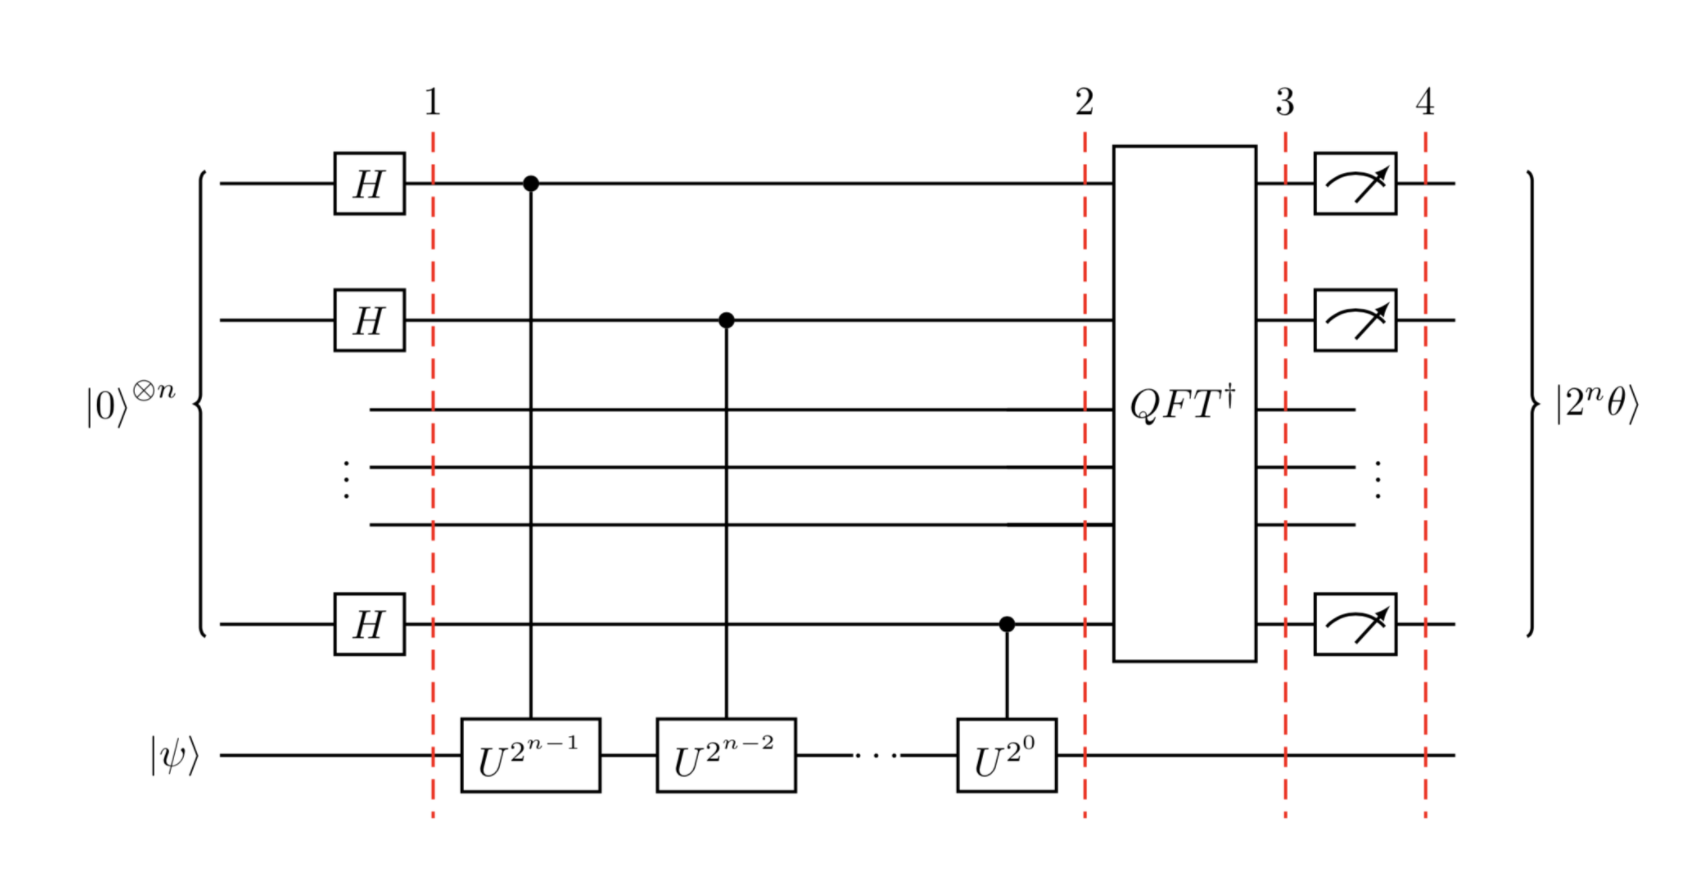


Below is an easy implementation with 3 qubits


In [6]:
# install requirements
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' # Makes the images look nice


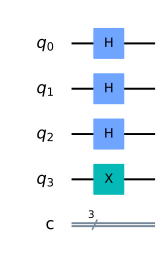

In [14]:
def qpe_three():
    qc = QuantumCircuit(4, 3)
    
    for n in range(3):
        qc.h(n)

    qc.x(3)
    return qc

qc.draw("mpl")


In [19]:
pi = np.pi
def urot_operations(circuit, theta):
    
    for x in range(3):
        exponent = 2**(3-x-1)
        print("exp: ", exponent)
        circuit.cu1(2*pi*theta*exponent, 3, x)
    
urot_operations(qc, 0.5)

exp:  4
exp:  2
exp:  1


exp:  4
exp:  2
exp:  1


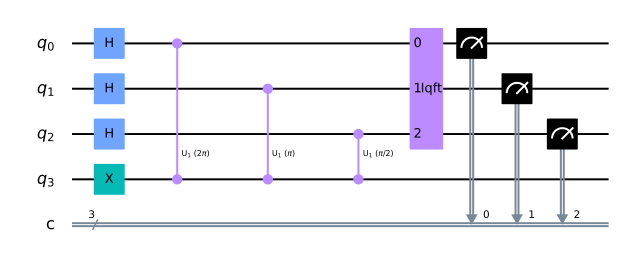

In [35]:
from qiskit.circuit.library import QFT
qc = qpe_three()

theta = 0.25
urot_operations(qc, theta)
qc.append(QFT(3).inverse(), range(3))
qc.measure(range(3), range(3))
qc.draw("mpl")



In [36]:
from qiskit import Aer, execute
import operator
n=3
theta = 0.25
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=1000).result().get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

highest_probability_outcome = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
print(int(highest_probability_outcome, 2))
measured_theta = int(highest_probability_outcome, 2)/2**n
print("Using %d qubits with theta = %.2f, measured_theta = %.2f." % (n, theta, measured_theta))

2
Using 3 qubits with theta = 0.25, measured_theta = 0.25.


## Question: What happens when you increase the number of measurement bits while keeping the target qubit the same?